# Métodos basados en el conocimiento

Los métodos basados en el conocimiento, tambien denominados heurísticos determinan la susceptibilidad y/o amenaza directa o indirectamente por un experto en el fenómeno y en la region de estudio. El proceso está basado en la experiencia individual y en el uso del razonamiento lógico. Las reglas de decisión son por lo tanto dificiles de formular por su complejidad y por que varían de lugar a lugar.

Los criterios utilizados generalmente por el experto son evidencia de actividad reciente, ambiente geomorfológico de cada unidad identificada, tipo de material y sus condiciones geomecánicas, pendiente de las laderas, relación con las unidades adyacentes, entre otros.

# Settings

In [1]:
!pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 1.3 MB/s 


In [2]:
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np

# Variables

(1389506,)

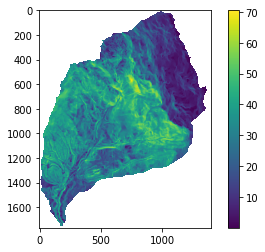

In [4]:
# Slope.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
pendiente = raster.read(1);

# nan limits.
lowerSlopeLimit = 0;
upperSlpoeLimit = 90;

# Reclasify nan.
pendiente = np.where(pendiente < lowerSlopeLimit, np.nan, pendiente);
pendiente = np.where(pendiente > upperSlpoeLimit, np.nan, pendiente);

# Render info.
plt.imshow(pendiente)
plt.colorbar();

# Vector
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

Columns - Rows:  (1768, 1394)
Unique Classes:  [0.1 0.5 1.  nan]


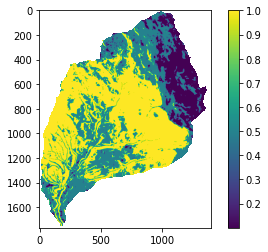

In [5]:
# Define class limits. 3 Classes.
slopeLimit1 = 10;
slopeLimit2 = 30;

# Calculations.
pendiente_re = pendiente;
pendiente_re = np.where ( (np.logical_and (pendiente_re >= 0, pendiente_re < slopeLimit1)), 0.1, pendiente_re);
pendiente_re = np.where ( (np.logical_and (pendiente_re >= slopeLimit1, pendiente_re < slopeLimit2)), 0.5, pendiente_re);
pendiente_re = np.where ( pendiente_re >= slopeLimit2, 1, pendiente_re);

# Render info.
print("Columns - Rows: ", np.shape(pendiente_re));
print("Unique Classes: ", np.unique(pendiente_re));
plt.imshow(pendiente_re);
plt.colorbar();

[0.0000000e+00 6.7693852e-03 6.9500757e-03 ... 3.5999222e+02 3.5999310e+02
           nan]


(1389506,)

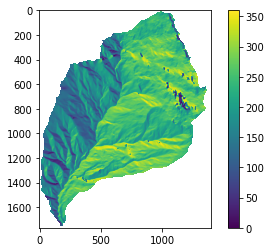

In [6]:
# Aspect.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_ASPECT_2m.tif?raw=true');
aspecto=raster.read(1);

# nan limits.
lowerAspectLimit = -1;
upperAspectLimit = 360;

# Reclasify nan.
aspecto=np.where(aspecto < lowerAspectLimit, np.nan, aspecto);
aspecto=np.where(aspecto > upperAspectLimit, np.nan, aspecto);

# Render info.
print(np.unique(aspecto));
plt.imshow(aspecto);
plt.colorbar();

# Vector
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
aspecto_vector_MenM.shape

Columns - Rows:  (1768, 1394)
Unique Classes:  [0.3 0.5 0.7 nan]


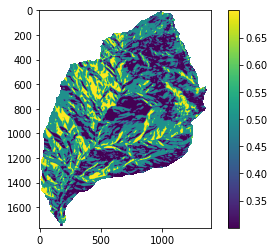

In [7]:
# Define class limits. 4 Classes.
aspectLimit1 = 22.5;  # Nort
aspectLimit2 = 67.5;  # Norteast
aspectLimit3 = 112.5; # East
aspectLimit4 = 157.5; # Southeast
aspectLimit5 = 202.5; # South
aspectLimit6 = 247.5; # Southwest
aspectLimit7 = 292.5; # West
aspectLimit8 = 337.5; # Nortwest
aspectLimit9 = 360; # Nort

# Aspect Susceptibility - NS Fault System.
aspectNort = 0.7;
aspectNorteast = 0.5;
aspectEast = 0.3;
aspectSoutheast = 0.5;
aspectSouth = 0.7;
aspectSouthwest = 0.5;
aspectWest= 0.3;
aspectNortwest = 0.5;

# Calculations.
aspecto_re = aspecto;
aspecto_re = np.where ((np.logical_and (aspecto_re >= 0, aspecto_re < aspectLimit1)), aspectNort, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit1, aspecto_re < aspectLimit2)), aspectNorteast, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit2, aspecto_re < aspectLimit3)), aspectEast, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit3, aspecto_re < aspectLimit4)), aspectSoutheast, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit4, aspecto_re < aspectLimit5)), aspectSouth, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit5, aspecto_re < aspectLimit6)), aspectSouthwest, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit6, aspecto_re < aspectLimit7)), aspectWest, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit7, aspecto_re < aspectLimit8)), aspectNortwest, aspecto_re);
aspecto_re = np.where ((np.logical_and (aspecto_re >= aspectLimit8, aspecto_re < aspectLimit9)), aspectNort, aspecto_re);

# Render info.
print("Columns - Rows: ", np.shape(aspecto_re));
print("Unique Classes: ", np.unique(aspecto_re));
plt.imshow(aspecto_re);
plt.colorbar();

(1768, 1394)
[ 1.  2.  3. nan]
(1389506,)


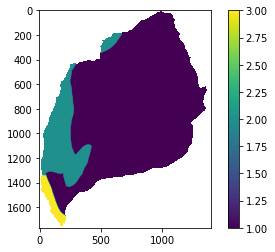

In [8]:
# Geology.

# Import Raster.
raster = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_GEO.tif?raw=true');
geologia = raster.read(1);
print(np.shape(geologia));

# Mask
raster_mask = rio.open('https://github.com/Dibarretot/CartografiaGeotecnica/blob/7c8c5e75a81d28924cf307fae782b644b8320f34/Taller3_InformacionSecundaria/AOI_SLOPE_Degree.tif?raw=true');
msk=raster_mask.read_masks(1);
msk=np.where(msk == 255, 1, np.nan);
geologia = msk * geologia;

# nan limits.
lowerGeologyLimit = 1;
upperGeologyLimit = 3;

# Reclasify nan.
geologia = np.where(geologia < lowerGeologyLimit, np.nan, geologia);
geologia = np.where(geologia > upperGeologyLimit, np.nan, geologia);

# Render info.
print(np.unique(geologia));
plt.imshow(geologia);
plt.colorbar();

# Vector
geologia_vector=geologia.ravel()
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]
print(geologia_vector_MenM.shape)

Columns - Rows:  (1768, 1394)
Unique Classes:  [0.3 0.7 nan]


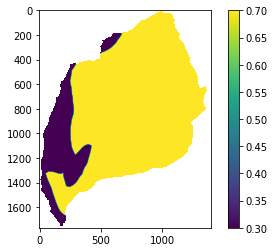

In [11]:
# Define class limits. 7 Classes. Normalized susceptibility.
GeologyClass1 = 0.7;  # Depositos de deslizamiento.
GeologyClass2 = 0.3;  # Dunita de Medellin.
GeologyClass3 = 0.3;  # Esquistos anfibolicos de Baldias.

# Calculations.
geologia_re = geologia;
geologia_re = np.where (geologia_re == 1, GeologyClass1, geologia_re);
geologia_re = np.where (geologia_re == 2, GeologyClass2, geologia_re);
geologia_re = np.where (geologia_re == 3, GeologyClass3, geologia_re);

# Render info.
print("Columns - Rows: ", np.shape(geologia_re));
print("Unique Classes: ", np.unique(geologia_re));
plt.imshow(geologia_re);
plt.colorbar();

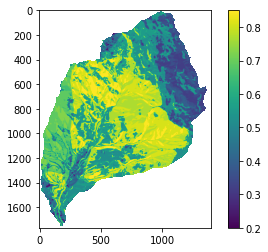

In [12]:
# Variable weigths.
w_pendiente = 0.5;
w_aspecto = 0.2;
w_geologia = 0.3;

# Index.
IS = (w_pendiente*pendiente_re) + (w_aspecto * aspecto_re) + (w_geologia * geologia_re);
plt.imshow(IS);
plt.colorbar();

Mean:  0.6282442292109811


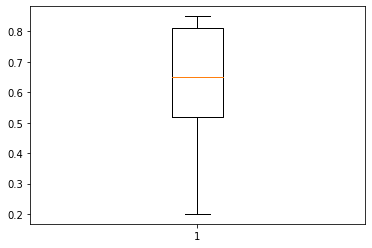

In [13]:
IS_vector = IS.ravel()
IS_vector = IS_vector[~np.isnan(IS_vector)]
IS_vector_mean = IS_vector.mean();
print('Mean: ', IS_vector_mean)
plt.boxplot(IS_vector);

Columns - Rows:  (1768, 1394)
Unique Classes:  [0.  0.5 1.  nan]


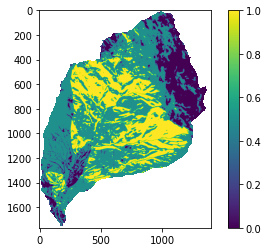

In [14]:
# Define class limits. 3 Classes.
ISLimit1 = IS_vector_mean * 0.75;
ISLimit2 = IS_vector_mean * 1.25;

# Calculations.
IS_re = IS;
IS_re = np.where ((np.logical_and (IS_re >= 0, IS < ISLimit1)), 0, IS);
IS_re = np.where ((np.logical_and (IS >= ISLimit1, IS_re < ISLimit2)), 0.5, IS_re);
IS_re = np.where ( IS >= ISLimit2, 1, IS_re);

# Render info.
print("Columns - Rows: ", np.shape(IS_re));
print("Unique Classes: ", np.unique(IS_re));
plt.imshow(IS_re);
plt.colorbar();

# Export

In [16]:
meta = raster.profile;
raster_transform = meta['transform'];
raster_crs = meta['crs'];

with rio.open('IS.TIF', 'w', driver = 'Gtiff', height = aspecto.shape[0], width = aspecto.shape[1], count = 1, dtype = 'float64', nodata = -999, crs = raster_crs, transform = raster_transform) as dst: dst.write(IS, 1);